In [1]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [30]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [9]:
# Carregando as imagens de Flores
main_path = "flowers"

train_daisy = glob.glob(main_path+"/daisy/*.jpg")
train_dandelion = glob.glob(main_path+"/dandelion/*.jpg")
train_rose = glob.glob(main_path+"/rose/*.jpg")
train_sunflower = glob.glob(main_path+"/sunflower/*.jpg")
train_tulip = glob.glob(main_path+"/tulip/*.jpg")

test_daisy = glob.glob(main_path+"/daisy/*.jpg")
test_dandelion = glob.glob(main_path+"/dandelion/*.jpg")
test_rose = glob.glob(main_path+"/rose/*.jpg")
test_sunflower = glob.glob(main_path+"/sunflower/*.jpg")
test_tulip = glob.glob(main_path+"/tulip/*.jpg")


In [10]:
# Gerando uma lista de Imagens de Treino
train_list = [x for x in train_daisy]
train_list.extend([x for x in train_dandelion])
train_list.extend([x for x in train_rose])
train_list.extend([x for x in train_sunflower])
train_list.extend([x for x in train_tulip])

#Gerando DataFrame de Imagens de Treino
df_train = pd.DataFrame(np.concatenate([['daisy']*len(train_daisy) , ['dandelion']*len(train_dandelion),
['rose']*len(train_rose),['sunflower']*len(train_sunflower),['tulip']*len(train_tulip)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

# Gerando uma lista de Imagens de Teste
test_list = [x for x in test_daisy]
test_list.extend([x for x in test_dandelion])
test_list.extend([x for x in test_rose])
test_list.extend([x for x in test_sunflower])
test_list.extend([x for x in test_tulip])

df_test = pd.DataFrame(np.concatenate([['daisy']*len(test_daisy) , ['dandelion']*len(test_dandelion),
['rose']*len(test_rose),['sunflower']*len(test_sunflower),['tulip']*len(test_tulip)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


In [11]:
df_train

,class,image
0,daisy,flowers/daisy\100080576_f52e8ee070_n.jpg
1,daisy,flowers/daisy\10140303196_b88d3d6cec.jpg
2,daisy,flowers/daisy\10172379554_b296050f82_n.jpg
3,daisy,flowers/daisy\10172567486_2748826a8b.jpg
4,daisy,flowers/daisy\10172636503_21bededa75_n.jpg
...,...,...
4312,tulip,flowers/tulip\9831362123_5aac525a99_n.jpg
4313,tulip,flowers/tulip\9870557734_88eb3b9e3b_n.jpg
4314,tulip,flowers/tulip\9947374414_fdf1d0861c_n.jpg
4315,tulip,flowers/tulip\9947385346_3a8cacea02_n.jpg


In [12]:
df_test

,class,image
0,daisy,flowers/daisy\100080576_f52e8ee070_n.jpg
1,daisy,flowers/daisy\10140303196_b88d3d6cec.jpg
2,daisy,flowers/daisy\10172379554_b296050f82_n.jpg
3,daisy,flowers/daisy\10172567486_2748826a8b.jpg
4,daisy,flowers/daisy\10172636503_21bededa75_n.jpg
...,...,...
4312,tulip,flowers/tulip\9831362123_5aac525a99_n.jpg
4313,tulip,flowers/tulip\9870557734_88eb3b9e3b_n.jpg
4314,tulip,flowers/tulip\9947374414_fdf1d0861c_n.jpg
4315,tulip,flowers/tulip\9947385346_3a8cacea02_n.jpg


# <a id="3">Quantitativo de Imagens</a> 

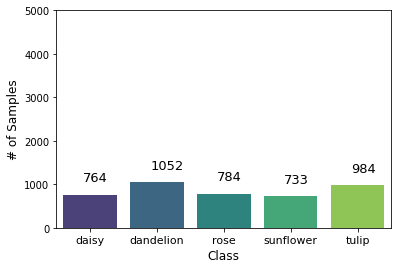

In [15]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1,2,3,4], ['daisy', 'dandelion','rose','sunflower','tulip'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

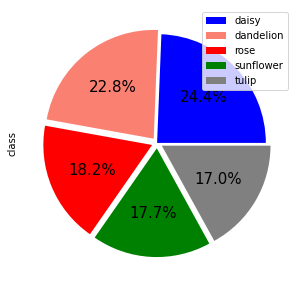

In [26]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['','','','',''], autopct='%1.1f%%', colors = ['blue','salmon','red','green','grey'],
explode = [0,0.05,0.05,0.05,0.05], textprops = {"fontsize":15})

plt.legend(labels=['daisy', 'dandelion','rose','sunflower','tulip'])
plt.show()

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['daisy', 'dandelion','rose','sunflower','tulip'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

In [ ]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

# <a id="4">Preparing the Data</a> 

First, we need to create a validation set. To do that, we apply a simple stratified split on the original train dataset, using 80% for actual training and 20% for validation purposes.

In [31]:
train_df, val_df = train_test_split(df_train, test_size = 0.30, random_state = SEED, stratify = df_train['class'])

In [32]:
train_df

,class,image
3003,sunflower,flowers/sunflower\4528959364_fa544b0f4e_m.jpg
2950,sunflower,flowers/sunflower\3798841385_38142ea3c6_n.jpg
3419,tulip,flowers/tulip\13562271714_d534531374.jpg
1531,dandelion,flowers/dandelion\5129135346_3fa8e804d8_n.jpg
3870,tulip,flowers/tulip\3253320570_b617f7fd4b.jpg
...,...,...
307,daisy,flowers/daisy\33843400403_db00aa16b8_n.jpg
670,daisy,flowers/daisy\7320089276_87b544e341.jpg
3886,tulip,flowers/tulip\3476945045_97ff41e8ec_n.jpg
3649,tulip,flowers/tulip\16670377091_87987f50a4_n.jpg


In [33]:
val_df

,class,image
3320,sunflower,flowers/sunflower\9610371852_179e7781ce.jpg
472,daisy,flowers/daisy\4229503616_9b8a42123c_n.jpg
492,daisy,flowers/daisy\4496202781_1d8e776ff5_n.jpg
2076,rose,flowers/rose\23096513535_f41ddfec19_n.jpg
4103,tulip,flowers/tulip\6770436217_281da51e49_n.jpg
...,...,...
2377,rose,flowers/rose\5349251139_92539c279a_n.jpg
1932,rose,flowers/rose\15901230359_1819e96b89_n.jpg
2403,rose,flowers/rose\5578760521_e54aca6bed_n.jpg
1978,rose,flowers/rose\17105684129_e2cb69ea24_n.jpg


Now, we’re going to load the images from the folders and prepare them to feed our models. 

We begin by defining the data generators. With Keras Image Data Generator, we can rescale the pixel values and apply random transformation techniques for data augmentation on the fly. We define two different generators. The val_datagen is used to simply rescale the validation and test sets. The train_datagen includes some transformations to augment the train set.

We apply those generators on each dataset using the flow_from_dataframe method. Apart from the transformations defined in each generator, the images are also resized based on the target_size set.

In [35]:
# https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = 1,
                                            shuffle = False)

Found 3324 validated image filenames belonging to 5 classes.
Found 993 validated image filenames belonging to 5 classes.
Found 4317 validated image filenames belonging to 5 classes.


Now, we are ready for the next stage: creating and training the image classification models.

# <a id="5">Custom CNN</a>

In [36]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.0000001,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 0.0000001,                                
    cooldown = 0,                               
    verbose = 1
) 

Let’s define our first model ‘from scratch’ and see how it performs.

In [37]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [38]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.00003), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [41]:
from keras.callbacks import ModelCheckpoint
# cria um checkpoint para salvar os pesos do melhor modelo encontrado no trainamento
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

# treina o modelo
          
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[checkpointer],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));
       

Epoch 1/50
104/103 [==============================] - ETA: 0s - loss: 0.5312 - binary_accuracy: 0.7998
Epoch 00001: val_loss improved from inf to 0.52223, saving model to model.weights.best.hdf5
103/103 [==============================] - 140s 1s/step - loss: 0.5312 - binary_accuracy: 0.7998 - val_loss: 0.5222 - val_binary_accuracy: 0.8000
Epoch 2/50
104/103 [==============================] - ETA: 0s - loss: 0.5301 - binary_accuracy: 0.8000
Epoch 00002: val_loss did not improve from 0.52223
103/103 [==============================] - 140s 1s/step - loss: 0.5301 - binary_accuracy: 0.8000 - val_loss: 0.5248 - val_binary_accuracy: 0.8000
Epoch 3/50
104/103 [==============================] - ETA: 0s - loss: 0.5300 - binary_accuracy: 0.8000
Epoch 00003: val_loss did not improve from 0.52223
103/103 [==============================] - 135s 1s/step - loss: 0.5300 - binary_accuracy: 0.8000 - val_loss: 0.5320 - val_binary_accuracy: 0.8000
Epoch 4/50
104/103 [==============================] - ETA: 

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# <a id="6">Transfer Learning</a> 

The second approach, called transfer learning, consists of using a pretrained model as a feature extractor. In this notebook, the selected model was the ResNet152V2 available on the Keras Package [(link)](https://keras.io/api/applications/resnet/#resnet152v2-function). 

This model was already trained in another dataset (ImageNet). What we do here is to set include_top to false, removing the ‘head’, responsible for assigning the classes in this other dataset, and keep all the previous layers. Then, we include our last few layers, including the one responsible for generating the output.



In [ ]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.00005), metrics='binary_accuracy')

model_pretrained.summary()

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# <a id="7">Fine Tuning</a> 

Our last approach is called Fine Tuning. In the last section, all the layers from the pretrained model were ‘frozen’, preserving the weights calculated during its training on the ImageNet dataset. Now, we are going to unfreeze a few of its last layers and continue the training, tuning the weights from these layers according to our dataset.

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

In [ ]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.000002), metrics='binary_accuracy')

model_pretrained.summary()

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

As expected, the fine-tuning approach has reached the best score. We end this notebook by showing a few performance metrics.

# <a id="8">Performance Metrics</a> 

In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [ ]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

The recall was close to 100%. Even without expertise on the medical field, it’s reasonable to assume that false negatives are more ‘costly’ than false positives in this case. Reaching such recall with a relatively small dataset for training as this one, while also reaching a pretty good recall, is a good indicative of the model’s capabilities. Such capabilities are also confirmed by the high ROC-AUC value.

# <a id="9">References</a> 

- https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
- https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb
- https://www.tensorflow.org/guide/keras/transfer_learning
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- https://keras.io/api/applications/
- https://keras.io/api/applications/resnet/#resnet152v2-function

## <center> If you find this notebook useful, support with an upvote! <center>